**Data Set Information:**

Number of instances 1030 <br/>
Number of Attributes	9 <br/>
Attribute breakdown	8 quantitative input variables, and 1 quantitative output variable <br/>
Missing Attribute Values	None 
<br/>

**Attribute Information:**

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database. 
<br/>
Name -- Data Type -- Measurement -- Description 
<br/>
Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Fine Aggregate (component 7)	-- quantitative -- kg in a m3 mixture -- Input Variable <br/>
Age -- quantitative -- Day (1~365) -- Input Variable <br/>
Concrete compressive strength -- quantitative -- MPa -- Output Variable <br/>


UCI Dataset Link - https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

The main elements for creating concrete is

Cement: A cement is a binder, a substance used for construction that sets, hardens, and adheres to other materials to bind them together.
<br/>Blast Furnace Slag: stony waste matter separated from metals during the smelting or refining of ore.
<br/>Fly Ash:  Fly ash or flue ash, also known as pulverized fuel ash in the United Kingdom, is a coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.
<br/>Water: The amount of water in concrete controls many fresh and hardened properties in concrete including workability, compressive strengths, permeability and water tightness, durability and weathering, drying shrinkage and potential for cracking
<br/>Superplasticizer: Superplasticizers, also known as high range water reducers, are chemical admixtures used where well-dispersed particle suspension is required. These polymers are used as dispersants to avoid particle segregation and to improve the flow characteristics of suspensions such as in concrete applications [3].
<br/>Coarse Aggregate: Coarse aggregate is the portion of the concrete which is made up of the larger stones embedded in the mix. Concrete contains three ingredients; Water, cement, and aggregate. That aggregate is made of fine sand and coarse gravel.
<br/>Fine Aggregate
<br/>Age: how many days
<br/>Concrete compressive strength

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

from scipy import stats
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

# import Standard scaler to scale the numeric fields as mentioned above in the description
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')

In [2]:
colNames = ['cement','furnace_slag','fly_ash','water','super_plasticizer',
            'coarse_agg','fine_agg','age','compressive_strength']

dfConcreteStrength = pd.read_csv("concrete.csv")
dfConcreteStrength.columns = colNames
dfConcreteStrength.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


**Quick data understanding with row, columns and datatypes**

In [3]:
dfConcreteStrength.shape

(1030, 9)

Contains 1030 rows with 9 columns. Compressive_strength is the target column

In [4]:
dfConcreteStrength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
furnace_slag            1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
super_plasticizer       1030 non-null float64
coarse_agg              1030 non-null float64
fine_agg                1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Data Cleaning

In [5]:
print (dfConcreteStrength.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


No null values present so nothing to handle in this data set

# Statistical Summary

In [6]:
dfConcreteStrength.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
super_plasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_agg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_agg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<div class="alert alert-block alert-info">
<b>Cement:</b>The mean is greater than the median and hence the data is right skewed. If we see the range from the median, max-50% value is much bigger than the 50%-min.

<b>Furnance_slag:</b>The mean is greater than the median and hence the data is right skewed. If we see the range from the median, max-50% value is much bigger than the 50%-min. Here the minimum value = 0. 

<b>Fly_ash:</b>The mean is greater than the median and hence the data is right skewed. Minimum and Median values are both zero. Max is going upto 200. Highly reight skewed data 

<b>Water:</b>The mean is approximately equal to the median and hence the data is a gaussian data. 

<b>Super_plasticizer:</b>The mean is approximately equal to the median and hence the data is a gaussian data. Minimum values = 0

<b>Coarse_agg:</b>The mean is approximately equal to the median and hence the data is a gaussian data. With little right tail extending

<b>Fine_agg:</b>The mean is approximately equal to the median and hence the data is a gaussian data. 

<b>Age:</b>The mean is greater than the median and hence the data is right skewed. With rightly skewed and tail extending

<b>Compressive_strength:</b>The mean is approximately equal to the median and hence the data is a gaussian data. 

</div>

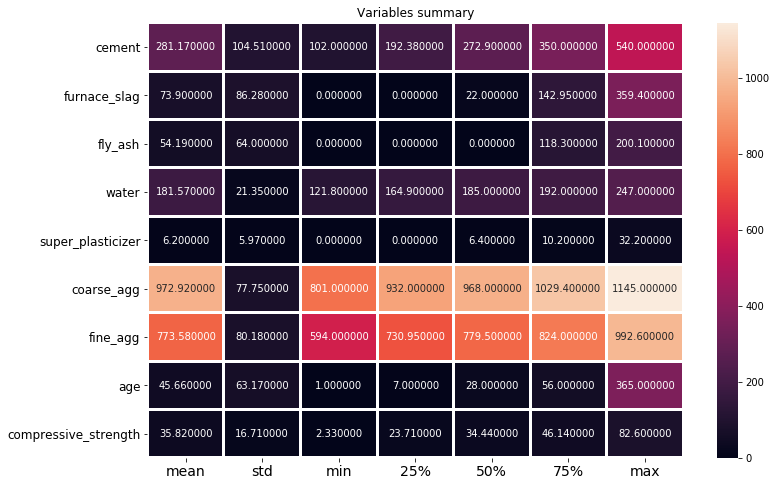

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(round(dfConcreteStrength.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f") 
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

<div class="alert alert-block alert-info">
<b>Features Summary:</b> Representing the statistical summary data in form of heatmap
</div>

# Outliers and Handling Them

In [8]:
#lets remove outliers using the IQR range
Q1 = dfConcreteStrength.quantile(0.25)
Q3 = dfConcreteStrength.quantile(0.75)
IQR = Q3 - Q1
IQR

cement                  157.625
furnace_slag            142.950
fly_ash                 118.300
water                    27.100
super_plasticizer        10.200
coarse_agg               97.400
fine_agg                 93.050
age                      49.000
compressive_strength     22.425
dtype: float64

In [9]:
# to remove outliers using IQR, will pass the above condition in the dataframe and will get another dataframe

dfConcreteStrengthWithNoOutliers = dfConcreteStrength[~((dfConcreteStrength[dfConcreteStrength.columns] < (Q1 - 3 * IQR)) 
                                   |(dfConcreteStrength[dfConcreteStrength.columns] > (Q3 + 3 * IQR))).any(axis=1)]
dfConcreteStrengthWithNoOutliers.shape

(997, 9)

# Univariate Analysis

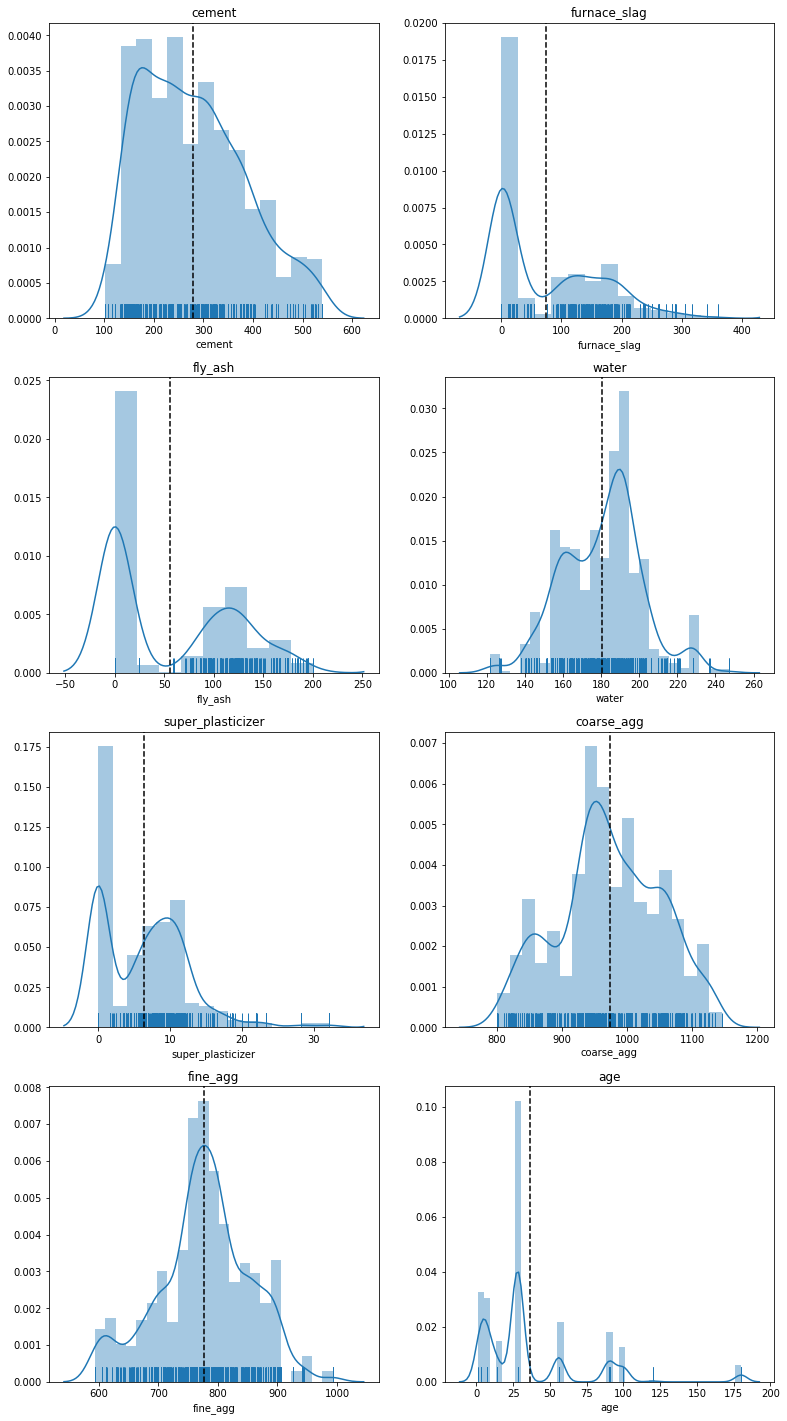

In [10]:
cols = [i for i in dfConcreteStrengthWithNoOutliers.columns if i not in 'compressive_strength']
fig = plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(dfConcreteStrengthWithNoOutliers[i],rug=True)
    ax.set_facecolor("w")
    plt.axvline(dfConcreteStrengthWithNoOutliers[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.title(i)

<div class="alert alert-block alert-info">
<b>Cement:</b>Contains data from multiple Gaussian. 3 visible peaks are there though 1 peak is between first and sceond one. So total 4 peaks, meaning data from 4 sources

<b>Furnance_slag:</b>Data is from 3 Gaussian mixtures with 3 clearly visible spikes 

<b>Fly_ash:</b>2 clearly visible peaks and 1 more slight peak at right tail, again from 3 data sources

<b>Water:</b>Data from 5 different sources, the 5th peak is verly low and behind the 4th peak at right most tail area

<b>Super_plasticizer:</b>2 peaks are clearly visible and with tail extending right, 2 small peaks exist there also. So overall 4 peaks, so data from 4 gaussian sources

<b>Coarse_agg:</b>Clearly visible on fromt side are 3 peaks. But you can observe 2 very small background peaks on right side tail fo the data

<b>Fine_agg:</b>5 visible peaks, data from 5 sources clubbed together 

<b>Age:</b>5 clearly visible peaks showing that data contains sets from 5 different gaussian sources


<b>Summary:</b>This shows that the dataset contains data from many sources and is not from one observation. 

</div>

# Target Column Distribution

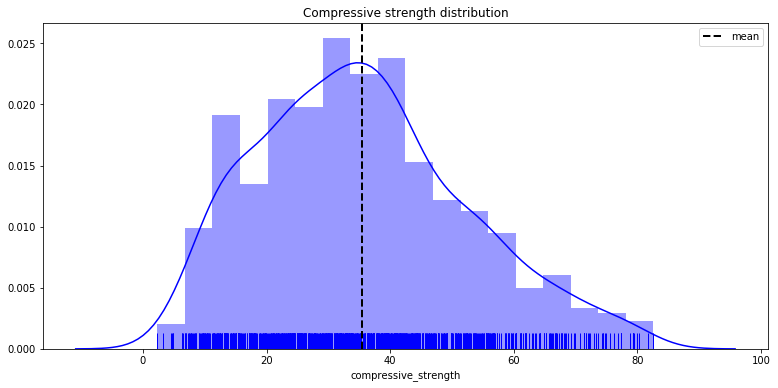

In [11]:
plt.figure(figsize=(13,6))
sns.distplot(dfConcreteStrengthWithNoOutliers["compressive_strength"],color="b",rug=True)
plt.axvline(dfConcreteStrengthWithNoOutliers["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best")
plt.title("Compressive strength distribution")
plt.show()

<div class="alert alert-block alert-info">
<b>Compressive Strength:</b>The data is from normal distribution but not from one source. Slight peaks on right tail and 2 clearly visible peaks on left of the mean tells that the data is from multiple sources merged in this dataset
</div>

# Multivariate Analysis

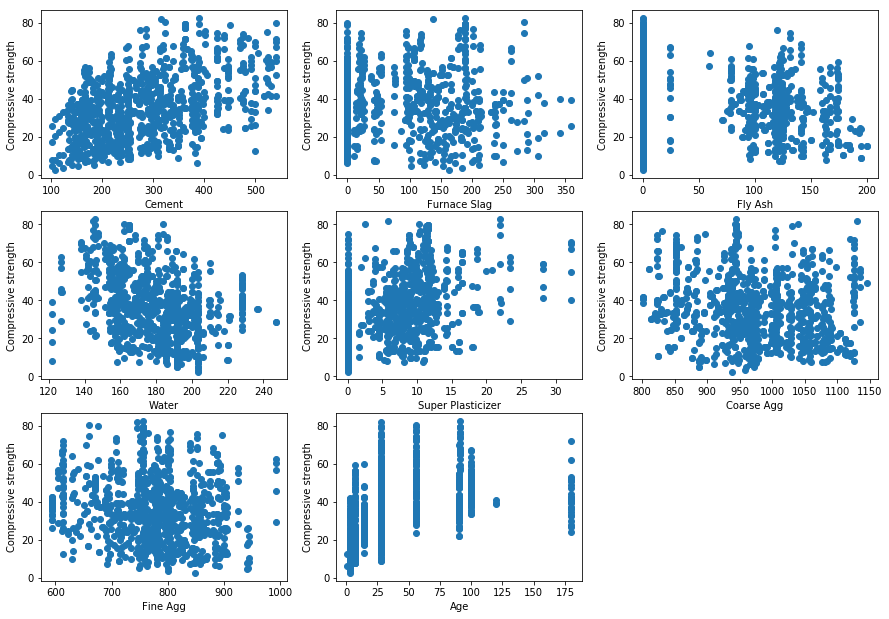

In [12]:
plt.figure(figsize=(15,10.5))
plot_count = 1

for feature in list(dfConcreteStrengthWithNoOutliers.columns)[:-1]:
        plt.subplot(3,3,plot_count)
        plt.scatter(dfConcreteStrengthWithNoOutliers[feature], dfConcreteStrengthWithNoOutliers['compressive_strength'])
        plt.xlabel(feature.replace('_',' ').title())
        plt.ylabel('Compressive strength')
        plot_count+=1
        
plt.show()

<div class="alert alert-block alert-info">
<b>Cement vs Compressive Strength:</b>It shows that as cement increases so is the compresive strength, but not linear. Initially it is a cloud and then later on spreading.

<b>Furnance Slag vs Compressive Strength:</b>No linear relationship, it is just a scattered behaviour, it shows that furnance slag alone is not a representation of compressive strength because for eg at 0 furnance slag, how can the compressive strength be increasing. So it must be the other factors that are influencing the strength even at constant furnance slag value. 

<b>Fly Ash vs Compressive Strength:</b>No linear relationship, it is just a scattered behaviour, it shows that fly ash alone is not a representation of compressive strength because for eg at 0 fly ash value, how can the compressive strength be increasing. So it must be the other factors that are influencing the strength even at constant fly ash value. 

<b>Water vs Compressive Strength:</b>No linear relationship, but a predictable behaviour, it shows that if water is less probably the strength is also less, and as water increases so is the compressive strength. Here also water alone doesnt give the strength, Water with cement gives the compressive strength. 

<b>Super Plasticizer vs Compressive Strength:</b>Its a cloud showing no linear relationship. Again it must be the other factors that are influencing the strength even at constant Super Plasticizer value.

<b>Coarse Agg vs Compressive Strength:</b>Its a cloud showing no linear relationship. Bi-directional increase of strength when coarse agg increases. Meaning strength increases verticaly and horizontaly in graph.

<b>Fine Agg vs Compressive Strength:</b>Its a cloud showing no linear relationship. Bi-directional increase of strength when fine agg increases. Meaning strength increases verticaly and horizontaly in graph. 

<b>Age vs Compressive Strength:</b>Individual spikes, showing with constant age also the strength increases and with age also strength increases. No linear relationship.

</div>

In [13]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = dfConcreteStrengthWithNoOutliers.corr(method='pearson')
print(correlations)

                      cement  furnace_slag  fly_ash  water  super_plasticizer  coarse_agg  \
cement                 1.000        -0.265   -0.396 -0.112              0.113      -0.120   
furnace_slag          -0.265         1.000   -0.334  0.108              0.042      -0.284   
fly_ash               -0.396        -0.334    1.000 -0.229              0.359      -0.013   
water                 -0.112         0.108   -0.229  1.000             -0.650      -0.172   
super_plasticizer      0.113         0.042    0.359 -0.650              1.000      -0.277   
coarse_agg            -0.120        -0.284   -0.013 -0.172             -0.277       1.000   
fine_agg              -0.199        -0.290    0.053 -0.414              0.199      -0.196   
age                    0.031        -0.057   -0.052  0.109             -0.071       0.023   
compressive_strength   0.495         0.140   -0.091 -0.342              0.399      -0.172   

                      fine_agg    age  compressive_strength  
cement 

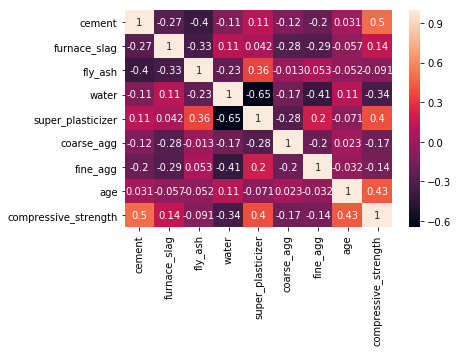

In [14]:
sns.heatmap(correlations, annot=True)

<div class="alert alert-block alert-info">
<b>Correlation with Compressive Strength:</b> We can see that only cement super platicizer and age are positively correlated with the compressive strength. Water is negatively correlated with strength. Also super platicizer and water are negatively correlated
</div>

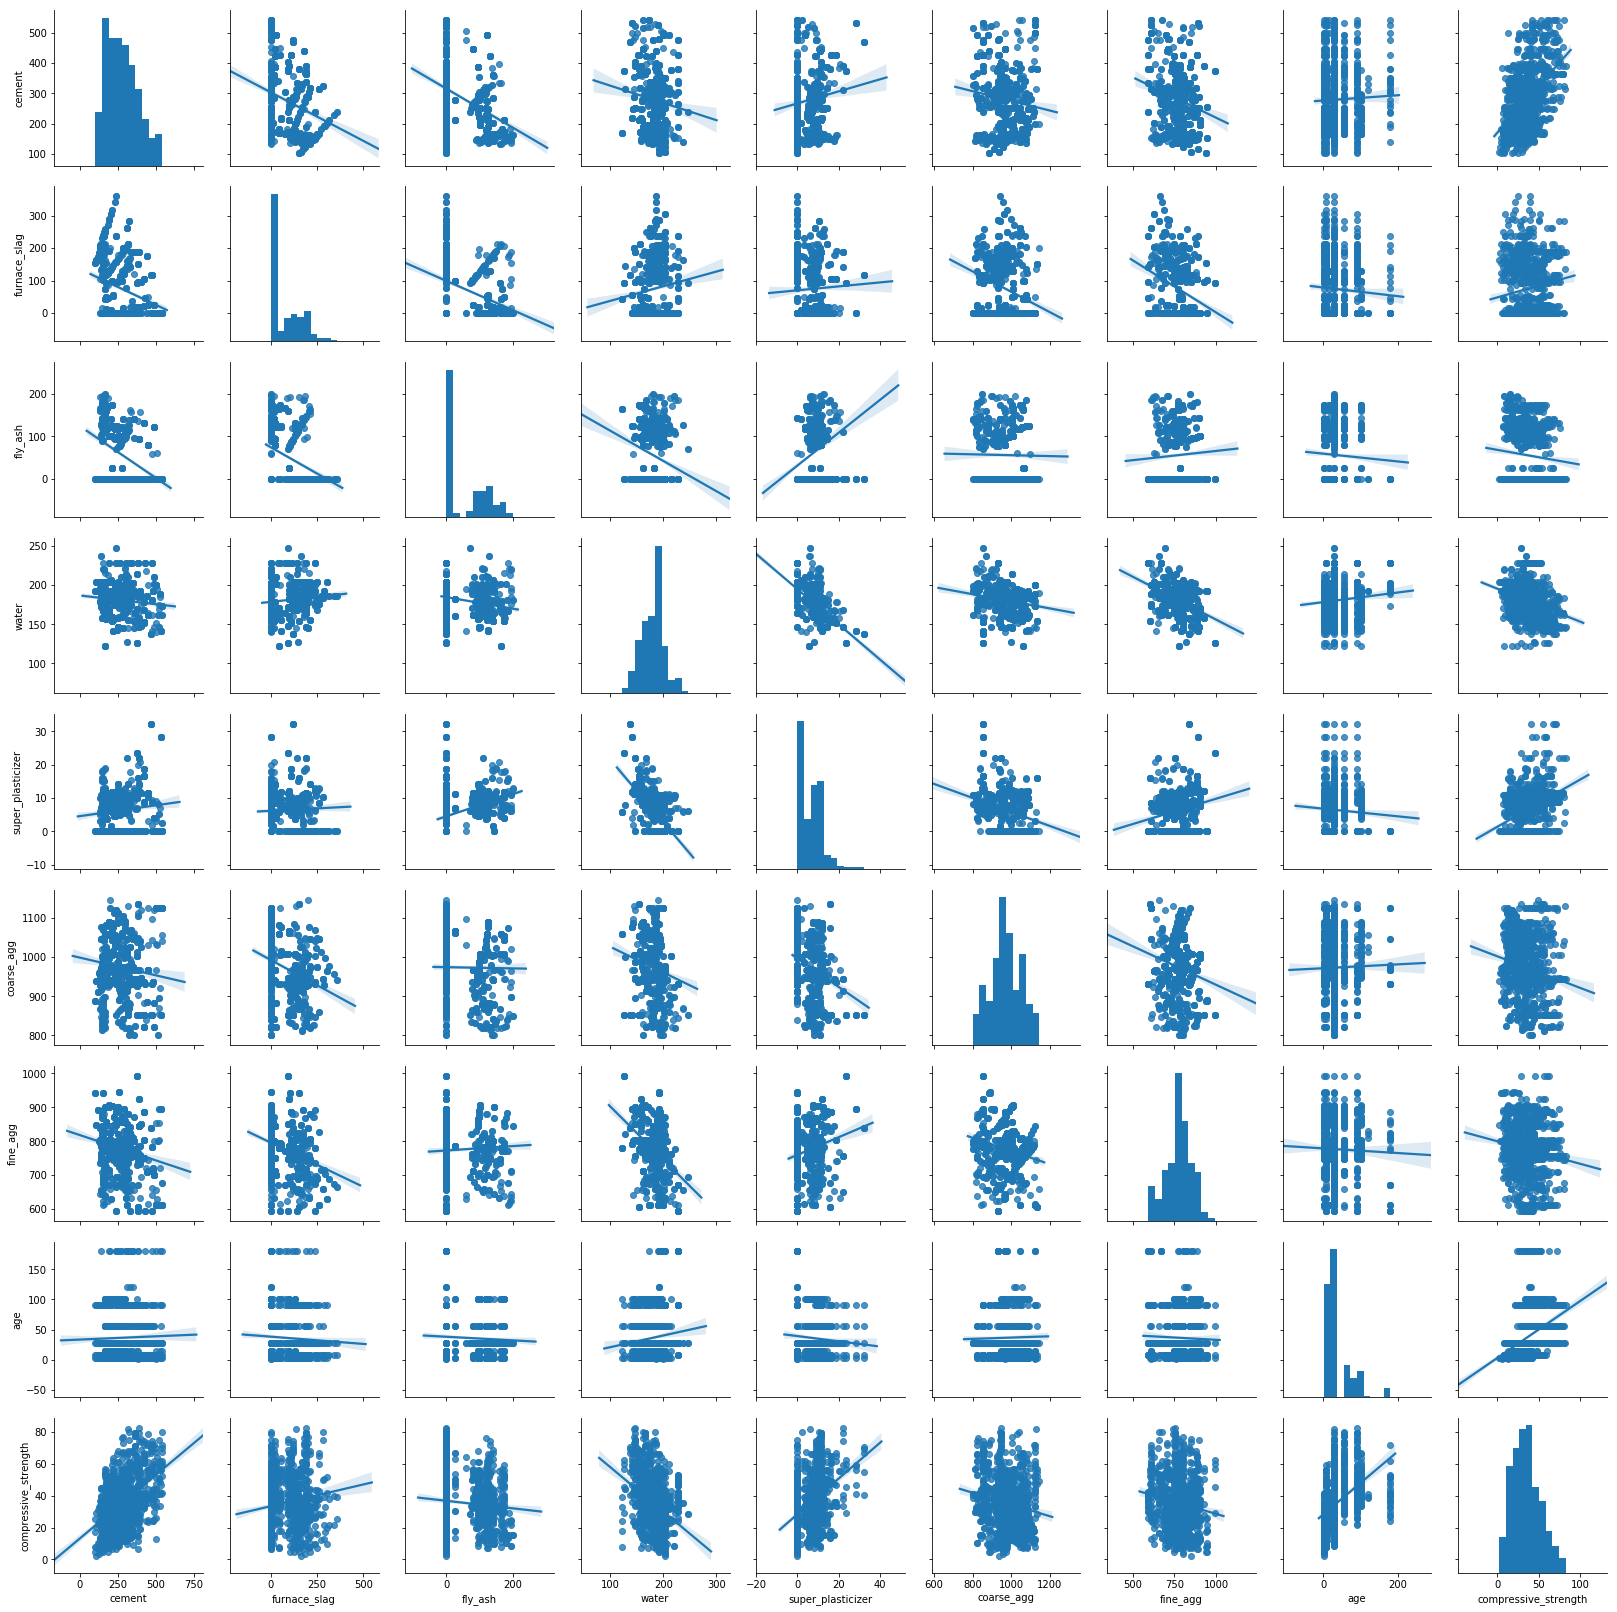

In [15]:
sns.pairplot(dfConcreteStrengthWithNoOutliers, vars=dfConcreteStrengthWithNoOutliers.columns, kind='reg')
plt.show()

# Scale dataset using Standard Scaler

In [16]:
dfConcreteStrengthScaledFeatures = dfConcreteStrengthWithNoOutliers.copy()

# Use Standard Scaler
colsToScale = ['cement','furnace_slag','fly_ash','water','super_plasticizer'
               ,'coarse_agg', 'fine_agg', 'age', 'compressive_strength']
scaledFeatures = dfConcreteStrengthScaledFeatures[colsToScale]
scaler = StandardScaler().fit(scaledFeatures.values)
scaledFeatures = scaler.transform(scaledFeatures.values) 

In [17]:
# for dataset which was transformed
dfConcreteStrengthScaledFeatures[colsToScale] = scaledFeatures
dfConcreteStrengthScaledFeatures.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,-1.326,1.594,-0.871,1.116,-1.076,-0.017,-0.357,-0.228,-0.333
1,-1.061,-0.369,1.063,-1.078,0.737,1.375,0.255,-0.609,-0.714
2,-0.283,-0.857,0.618,0.335,-0.153,-0.208,1.089,-0.228,-0.373
3,-0.129,0.461,-0.871,2.306,-1.076,-0.526,-1.364,-0.228,0.619
4,-1.196,1.264,-0.871,0.621,0.451,0.949,-1.022,-0.228,-1.025


### STATSMODELS for Linear Regression  and using p-value to drop columns based on hypothesis ###

In [18]:
# create a fitted model with all features
lm1 = smf.ols(formula='compressive_strength ~ cement + furnace_slag + fly_ash + water + super_plasticizer + '
              'coarse_agg + fine_agg + age', data=dfConcreteStrengthScaledFeatures).fit()

# print the coefficients
lm1.params

Intercept           -2.082e-16
cement               7.211e-01
furnace_slag         5.109e-01
fly_ash              3.098e-01
water               -2.157e-01
super_plasticizer    8.152e-02
coarse_agg           4.742e-02
fine_agg             5.168e-02
age                  4.847e-01
dtype: float64

We can see here that intercept is negative <br/>

Also among all features, water is only negative coefficient, rest all are positive

In [19]:
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                  Adj. R-squared:     0.698    
Dependent Variable: compressive_strength AIC:                1644.0564
Date:               2019-09-01 17:40     BIC:                1688.1991
No. Observations:   997                  Log-Likelihood:     -813.03  
Df Model:           8                    F-statistic:        289.4    
Df Residuals:       988                  Prob (F-statistic): 8.13e-253
R-squared:          0.701                Scale:              0.30184  
-----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
Intercept          -0.0000    0.0174  -0.0000  1.0000  -0.0341   0.0341
cement              0.7211    0.0475  15.1917  0.0000   0.6279   0.8142
furnace_slag        0.5109    0.0472  10.8262  0.0000   0.4183   0.6035
fly_ash             0.3098    0.0433   7.1569  0.0000   0.2249   0.3948
water              -0.2157    0.0440  -4.8979  0.0000  -0.3022  -0.1293
super_plasticizer   0.0815    0.0295   2.7600  0.0059   0.0236   0.1395
coarse_agg          0.0474    0.0396   1.1977  0.2313  -0.0303   0.1251
fine_agg            0.0517    0.0449   1.1499  0.2505  -0.0365   0.1399
age                 0.4847    0.0176  27.5495  0.0000   0.4502   0.5192
----------------------------------------------------------------------
Omnibus:               10.881         Durbin-Watson:            1.956 
Prob(Omnibus):         0.004          Jarque-Bera (JB):         14.823
Skew:                  -0.108         Prob(JB):                 0.001 
Kurtosis:              3.557          Condition No.:            8     
======================================================================

"""

**Hypothesis**
H0 - there is a relationship between the feature and target value

Ha - there is no relationship between the feature and target value

**p-value**

Represents the probability that the coefficient is actually zero

**Interpreting p-values** <br/>

If the 95% confidence interval does not include zero <br/>
p-value will be less than 0.05 <br/>
Reject the null <br/>
There is a relationship <br/>

If the 95% confidence interval includes zero <br/>
p-value for that coefficient will be greater than 0.05 <br/>
Fail to reject the null <br/>
There is no relationship <br/>

# **Based on this: -** we can see above that the p-value for columns "coarse_agg" and "fine_agg"  fail to reject the null hypothesis <br/>

**So we will drop these two features and then check the linear regression model score**

In [20]:
# create a fitted model with five features
lm1 = smf.ols(formula='compressive_strength ~ cement + furnace_slag + fly_ash + water + super_plasticizer + '
              ' age', data=dfConcreteStrengthScaledFeatures).fit()

# print the coefficients
print(lm1.params)

lm1.summary2()

Intercept           -2.082e-16
cement               6.717e-01
furnace_slag         4.611e-01
fly_ash              2.690e-01
water               -2.615e-01
super_plasticizer    7.133e-02
age                  4.849e-01
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                  Adj. R-squared:     0.699    
Dependent Variable: compressive_strength AIC:                1641.5795
Date:               2019-09-01 17:40     BIC:                1675.9128
No. Observations:   997                  Log-Likelihood:     -813.79  
Df Model:           6                    F-statistic:        385.8    
Df Residuals:       990                  Prob (F-statistic): 4.47e-255
R-squared:          0.700                Scale:              0.30169  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.0000   0.0174  -0.0000 1.0000 -0.0341  0.0341
cement                 0.6717   0.0238  28.2622 0.0000  0.6251  0.7183
furnace_slag           0.4611   0.0230  20.0748 0.0000  0.4160  0.5061
fly_ash                0.2690   0.0264  10.1961 0.0000  0.2172  0.3207
water                 -0.2615   0.0235 -11.1351 0.0000 -0.3076 -0.2154
super_plasticizer      0.0713   0.0268   2.6621 0.0079  0.0187  0.1239
age                    0.4849   0.0176  27.5861 0.0000  0.4504  0.5194
----------------------------------------------------------------------
Omnibus:               11.083         Durbin-Watson:            1.956 
Prob(Omnibus):         0.004          Jarque-Bera (JB):         14.913
Skew:                  -0.116         Prob(JB):                 0.001 
Kurtosis:              3.552          Condition No.:            3     
======================================================================

"""

# We see that after dropping two columns we dont have much improvement in the R2 and Adj R2 values. They remain approx same

**So again we can conclude that we will keep all the columns in the data frame and continue model building**

--------------------------------------------------------------------------------------------------------------------------

# Making Composite Features

In [21]:
dfWithNewFeatures = dfConcreteStrengthScaledFeatures.copy()
dfWithNewFeatures['Water_Cement'] = dfWithNewFeatures['water']/dfWithNewFeatures['cement']
dfWithNewFeatures['Water_CementAndFurnanceSlag'] = dfWithNewFeatures['water']/(dfWithNewFeatures['cement'] + dfWithNewFeatures['furnace_slag'])

dfWithNewFeatures.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength,Water_Cement,Water_CementAndFurnanceSlag
0,-1.326,1.594,-0.871,1.116,-1.076,-0.017,-0.357,-0.228,-0.333,-0.842,4.159
1,-1.061,-0.369,1.063,-1.078,0.737,1.375,0.255,-0.609,-0.714,1.016,0.754
2,-0.283,-0.857,0.618,0.335,-0.153,-0.208,1.089,-0.228,-0.373,-1.184,-0.294
3,-0.129,0.461,-0.871,2.306,-1.076,-0.526,-1.364,-0.228,0.619,-17.844,6.946
4,-1.196,1.264,-0.871,0.621,0.451,0.949,-1.022,-0.228,-1.025,-0.519,9.229


Let's run the linear regression model and find the p values again with the new added features. Also will check R2 and Adj R2 values to ee any improvment in the model building

In [22]:
# create a fitted model with all features
lm1 = smf.ols(formula='compressive_strength ~ cement + furnace_slag + fly_ash + water + super_plasticizer + '
              'coarse_agg + fine_agg + age + Water_Cement + Water_CementAndFurnanceSlag', data=dfWithNewFeatures).fit()

# print the coefficients
print(lm1.params)

lm1.summary2()

Intercept                     -7.548e-04
cement                         7.208e-01
furnace_slag                   5.126e-01
fly_ash                        3.093e-01
water                         -2.184e-01
super_plasticizer              7.856e-02
coarse_agg                     4.320e-02
fine_agg                       5.030e-02
age                            4.845e-01
Water_Cement                   3.451e-03
Water_CementAndFurnanceSlag    3.953e-04
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                   Adj. R-squared:      0.699    
Dependent Variable:    compressive_strength  AIC:                 1645.5499
Date:                  2019-09-01 17:40      BIC:                 1699.5022
No. Observations:      997                   Log-Likelihood:      -811.77  
Df Model:              10                    F-statistic:         231.9    
Df Residuals:          986                   Prob (F-statistic):  6.85e-251
R-squared:             0.702                 Scale:               0.30169  
---------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   -0.0008   0.0174 -0.0433 0.9654 -0.0349  0.0334
cement                       0.7208   0.0475 15.1863 0.0000  0.6277  0.8140
furnace_slag                 0.5126   0.0472 10.8626 0.0000  0.4200  0.6052
fly_ash                      0.3093   0.0433  7.1468 0.0000  0.2244  0.3943
water                       -0.2184   0.0441 -4.9561 0.0000 -0.3049 -0.1319
super_plasticizer            0.0786   0.0296  2.6551 0.0081  0.0205  0.1366
coarse_agg                   0.0432   0.0397  1.0870 0.2773 -0.0348  0.1212
fine_agg                     0.0503   0.0450  1.1189 0.2635 -0.0379  0.1385
age                          0.4845   0.0176 27.5461 0.0000  0.4500  0.5190
Water_Cement                 0.0035   0.0023  1.5012 0.1336 -0.0011  0.0080
Water_CementAndFurnanceSlag  0.0004   0.0008  0.4785 0.6324 -0.0012  0.0020
---------------------------------------------------------------------------
Omnibus:                  10.726          Durbin-Watson:             1.955 
Prob(Omnibus):            0.005           Jarque-Bera (JB):          14.399
Skew:                     -0.112          Prob(JB):                  0.001 
Kurtosis:                 3.545           Condition No.:             121   
===========================================================================

"""

# After adding composite features, there is again no use because the R2 and Adj R2 values are almost approx same. Also p-values for the new columns are also > 0.05 and hence they two cannot be considered.

<div class="alert alert-block alert-info">
<b>Summary With Respect TO COLUMNS:</b> BASED ON ABOVE INFERENCES, WE CAN CONCLUDE TO USE THE SAME NUMBER OF FEATURES - 'cement','furnace_slag','fly_ash','water','super_plasticizer','age'. DROPPING TWO COLUMNS 'coarse_agg','fine_agg'
</div>

Let's implement different regression mdoels using the scikit libraries and find the MSE, MAE and R^2 

In [23]:
def split_train_test(data, feature):
    X = data[features]
    y = data.compressive_strength
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
    return x_train, x_test, y_train, y_test

In [24]:
def print_scores(features, model, y_test, y_pred):
    print('Features: %s '%str(features))
    print('R2 score: %f' %r2_score(y_test, y_pred))
    print('Mean Absolute Error: %f' %mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: %f' %mean_squared_error(y_test, y_pred))

In [25]:
def plot_feature_importance_coef(features, model):
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    coef = pd.DataFrame(model.coef_.ravel())
    coef["featureImportance"] = features
    ax1 = sns.barplot(coef["featureImportance"],coef[0],palette="Set2",linewidth=2)
    ax1.set_facecolor("lightgrey")
    ax1.axhline(0,color="k",linewidth=2)
    plt.ylabel("coefficients")
    plt.xlabel("features")
    plt.title('Feature Importance')


In [26]:
def plot_feature_importance_ensemble(features, model):
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    coef = pd.DataFrame(model.feature_importances_)
    coef["featureImportance"] = features
    ax1 = sns.barplot(coef["featureImportance"],coef[0],palette="Set1",linewidth=2)
    ax1.set_facecolor("lightgrey")
    ax1.axhline(0,color="k",linewidth=2)
    plt.ylabel("coefficients")
    plt.xlabel("features")
    plt.title('Feature Importance')


In [27]:
dfConcreteStrengthScaledFeatures.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,-1.326,1.594,-0.871,1.116,-1.076,-0.017,-0.357,-0.228,-0.333
1,-1.061,-0.369,1.063,-1.078,0.737,1.375,0.255,-0.609,-0.714
2,-0.283,-0.857,0.618,0.335,-0.153,-0.208,1.089,-0.228,-0.373
3,-0.129,0.461,-0.871,2.306,-1.076,-0.526,-1.364,-0.228,0.619
4,-1.196,1.264,-0.871,0.621,0.451,0.949,-1.022,-0.228,-1.025


In [28]:
features = ['cement','furnace_slag','fly_ash','water','super_plasticizer','age']

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.679421
Mean Absolute Error: 0.443184
Mean Squared Error: 0.339950
Intercept: -0.023707
Coefficients: [ 0.65566564  0.44310253  0.26642205 -0.23497835  0.09478199  0.48544248]


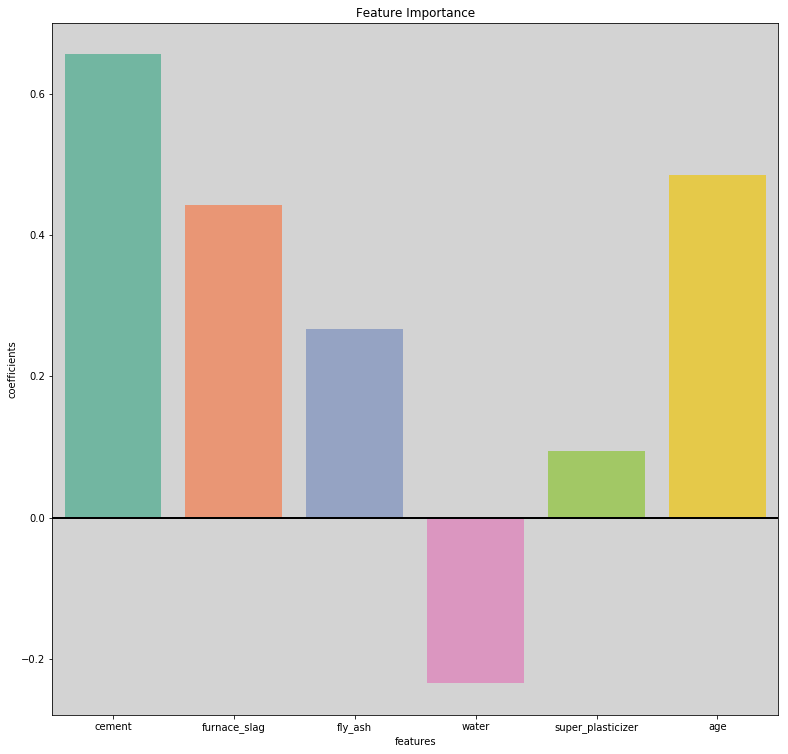

In [29]:
# Create linear regression object
modelRegression = LinearRegression()

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)

# Train the model using the training sets
modelRegression.fit(x_train, y_train)
y_pred = modelRegression.predict(x_test)

lr_r2score = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelRegression, y_test, y_pred)
print('Intercept: %f' %modelRegression.intercept_)
print('Coefficients: %s' %str(modelRegression.coef_))
plot_feature_importance_coef(features,modelRegression)

<div class="alert alert-block alert-info">
<b>Summary:</b> R2 score is 0.679. Also as you see in the feature importance bar chart, water appears negatively associated with the target column. Cement contributes maximum association
</div>

**Try Polynomial Features**

In [30]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)

X_train_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)
print(poly_clf.score(X_test_, y_test))

0.7527068311708085


In [31]:
poly = PolynomialFeatures(degree=3, interaction_only=True)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)

X_train_ = poly.fit_transform(x_train)
X_test_ = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)
print(poly_clf.score(X_test_, y_test))


0.7552928319603214


<div class="alert alert-block alert-info">
<b>Summary Polynomial Features:</b> Score is 0.75 whether the polynomial degree is 2 or 3. Will try more models and then conclude
</div>

Ridge Model

In [32]:
alphas = np.arange(0.1,5,0.1)

modelRidge = Ridge()
cv = GridSearchCV(estimator=modelRidge, param_grid=dict(alpha=alphas))

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = cv.fit(x_train, y_train).predict(x_test)

ridge_r2score = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelRidge, y_test, y_pred)

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.678861
Mean Absolute Error: 0.443795
Mean Squared Error: 0.340543


<div class="alert alert-block alert-info">
<b>Summary Ridge:</b> R2 score is 0.678 almost same as that of Linear Regression model above
</div>

Lasso Model

In [33]:
modelLasso = Lasso()
cv = GridSearchCV(estimator=modelLasso, param_grid=dict(alpha=alphas))

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = cv.fit(x_train, y_train).predict(x_test)

lasso_r2score = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelLasso, y_test, y_pred)

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.570446
Mean Absolute Error: 0.528125
Mean Squared Error: 0.455510


<div class="alert alert-block alert-info">
<b>Summary Lasso:</b> R2 score is 0.57. Worst performer, much below the Linear Regression model created above
</div>

Random Forest Regressor

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.873765
Mean Absolute Error: 0.256650
Mean Squared Error: 0.133863


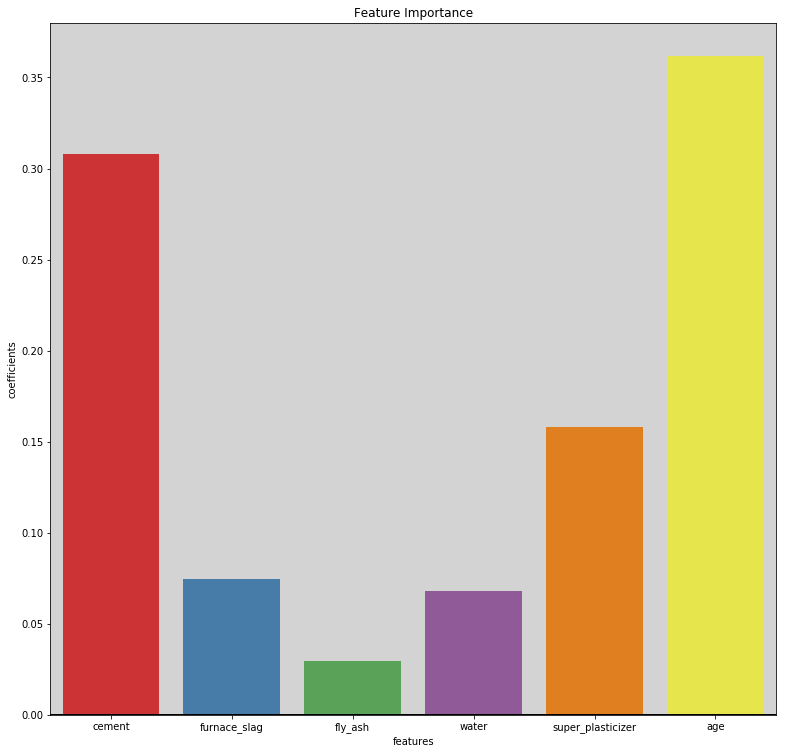

In [34]:
modelRandomForest = RandomForestRegressor()

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelRandomForest.fit(x_train, y_train).predict(x_test)

rf_r2score = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelRandomForest, y_test, y_pred)
plot_feature_importance_ensemble(features,modelRandomForest)

<div class="alert alert-block alert-info">
<b>Summary Random Forest:</b> R2 score is 0.88. Also as you see in the feature importance bar chart, water here is now positvely associated with the target column. Cement contributes maximum association, followed by age, furnance_slag and water. This cement and age really tells us that with time the compressive strength of cement increases
</div>

Extra Tree Regressor

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.883944
Mean Absolute Error: 0.230382
Mean Squared Error: 0.123068


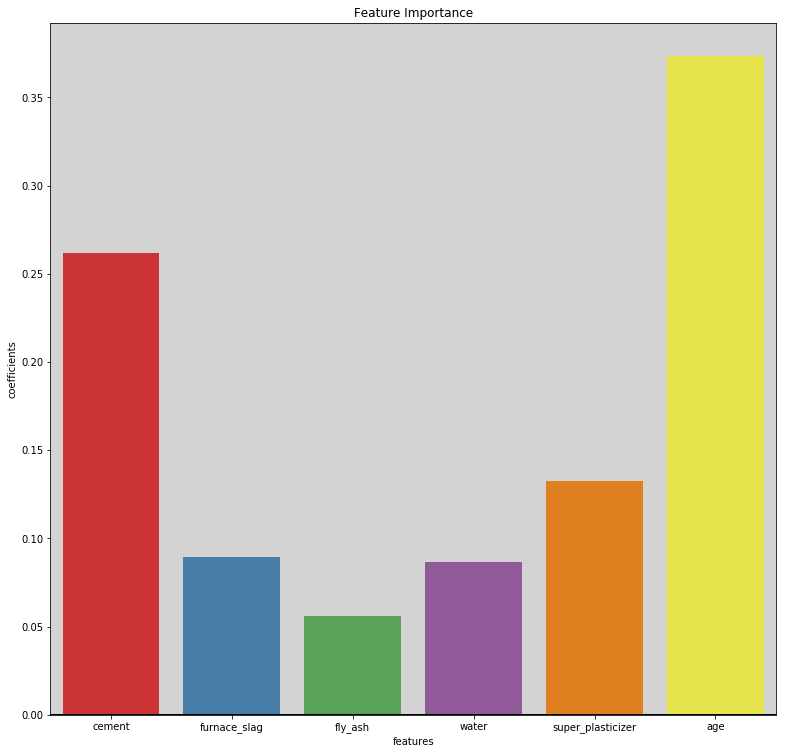

In [35]:
modelExtraTree = ExtraTreesRegressor()

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelExtraTree.fit(x_train, y_train).predict(x_test)

extraTree_r2score = r2_score(y_test, y_pred)
extraTree_mae = mean_absolute_error(y_test, y_pred)
extraTree_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelExtraTree, y_test, y_pred)
plot_feature_importance_ensemble(features,modelExtraTree)

<div class="alert alert-block alert-info">
<b>Summary Extra Tree Regressor:</b> R2 score is 0.88. Also as you see in the feature importance bar chart, age here is highly associated with the target column compared to cement which came out in the Ranom Forest model. So, Age contributes maximum association, followed by cement, furnance_slag and water. 
</div>

Gradient Boosting Regressor

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.884200
Mean Absolute Error: 0.242606
Mean Squared Error: 0.122797


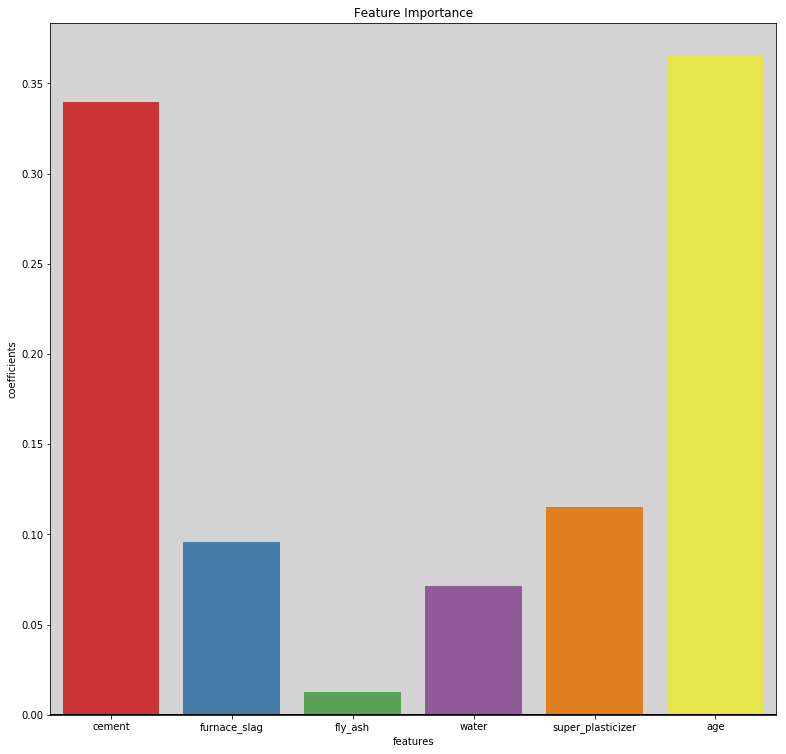

In [36]:
modelGBR = GradientBoostingRegressor()

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelGBR.fit(x_train, y_train).predict(x_test)

gbr_r2score = r2_score(y_test, y_pred)
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelGBR, y_test, y_pred)
plot_feature_importance_ensemble(features,modelGBR)

<div class="alert alert-block alert-info">
<b>Summary Gradient Boosting Regressor:</b> R2 score is 0.88. Also as you see in the feature importance bar chart, age here is highly associated with the target column compared to cement which came out in the Random Forest model. This list of feature importance is similar with the Extra tree regressor
</div>

# RandomizedSearchCV - extra performance out of the model without making it overfit or underfit

Random Forest Regressor with Randomized Search CV

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [38]:
rf_random = RandomizedSearchCV(estimator = modelRandomForest, param_distributions = random_grid, cv = 5, random_state=42, 
                               n_jobs = -1)
# Fit the random search model
x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None,

In [39]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.879807
Mean Absolute Error: 0.253937
Mean Squared Error: 0.127456


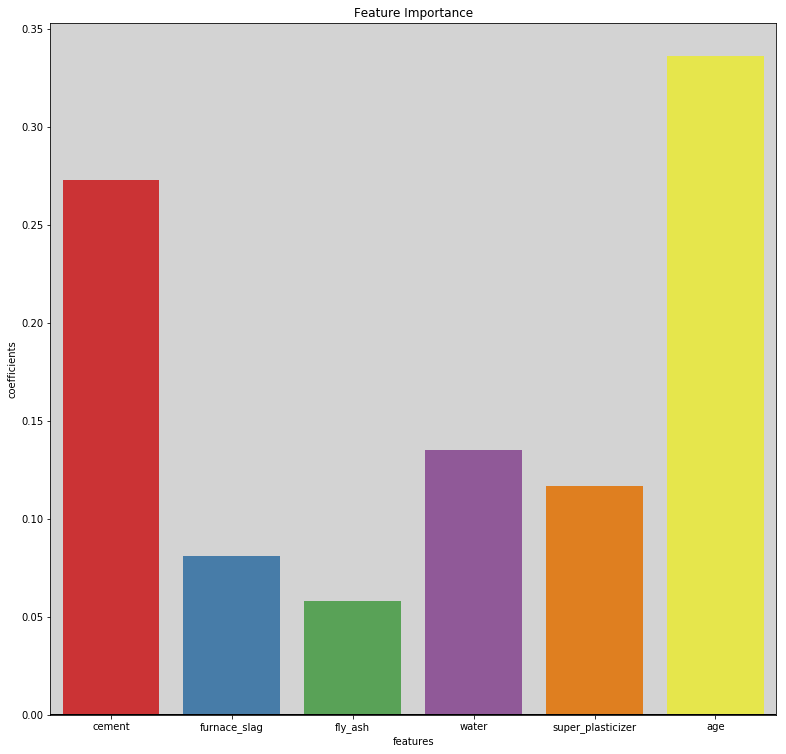

In [40]:
modelRandomForest = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, max_features = 'sqrt', max_depth = 45)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelRandomForest.fit(x_train, y_train).predict(x_test)

rf_rscv_r2score = r2_score(y_test, y_pred)
rf_rscv_mae = mean_absolute_error(y_test, y_pred)
rf_rscv_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelRandomForest, y_test, y_pred)
plot_feature_importance_ensemble(features,modelRandomForest)

<div class="alert alert-block alert-info">
<b>Summary RandomizedGridSearchCV (Random Forest):</b> R2 score is 0.87. In the feature importance bar chart, age here is now highly associated with the target column compared to cement which came out in the Random Forest model. This list of feature importance is similar with the Extra tree regressor and Gradient Boosting Regressor
</div>

Extra Tree Regressor with Randomized Search CV

In [41]:
rf_random = RandomizedSearchCV(estimator = modelExtraTree, param_distributions = random_grid, cv = 5, random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=ExtraTreesRegressor(bootstrap=False,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
             

In [42]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.879397
Mean Absolute Error: 0.252729
Mean Squared Error: 0.127890


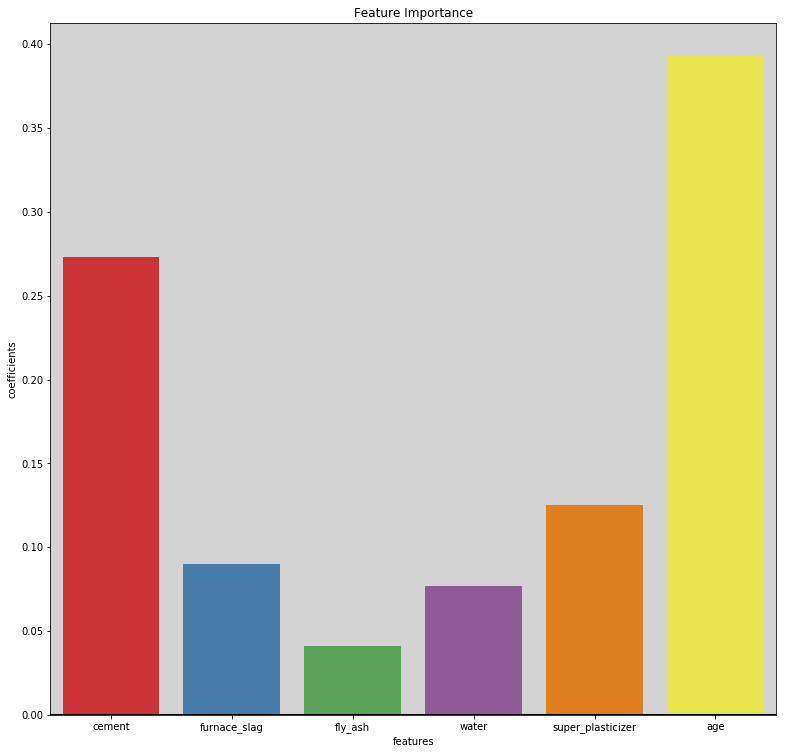

In [43]:
modelExtraTree = ExtraTreesRegressor(n_estimators = 155, min_samples_split = 10, max_features = 'auto', max_depth = 45)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelExtraTree.fit(x_train, y_train).predict(x_test)

extraTree_rscv_r2score = r2_score(y_test, y_pred)
extraTree_rscv_mae = mean_absolute_error(y_test, y_pred)
extraTree_rscv_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelExtraTree, y_test, y_pred)
plot_feature_importance_ensemble(features,modelExtraTree)

<div class="alert alert-block alert-info">
<b>Summary RandomizedGridSearchCV (Extra Tree Regressor):</b> R2 score is 0.87. In the feature importance bar chart, age here is very highly associated with the target column. Next is cement.  list of feature importance is similar with the Extra tree regressor and Gradient Boosting Regressor, except that the contribution of age has increased
</div>

Gradient Boosting Regressor with Randomized Search CV

In [44]:
search_grid={'n_estimators':[100,500,1000],'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}

search=RandomizedSearchCV(estimator=modelGBR, param_distributions=search_grid, cv = 5, random_state=42, 
                               n_jobs = -1)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)

search.fit(x_train, y_train)
search.best_params_

{'subsample': 0.75,
 'random_state': 1,
 'n_estimators': 1000,
 'max_depth': 2,
 'learning_rate': 0.1}

Features: ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer', 'age'] 
R2 score: 0.917223
Mean Absolute Error: 0.204332
Mean Squared Error: 0.087778


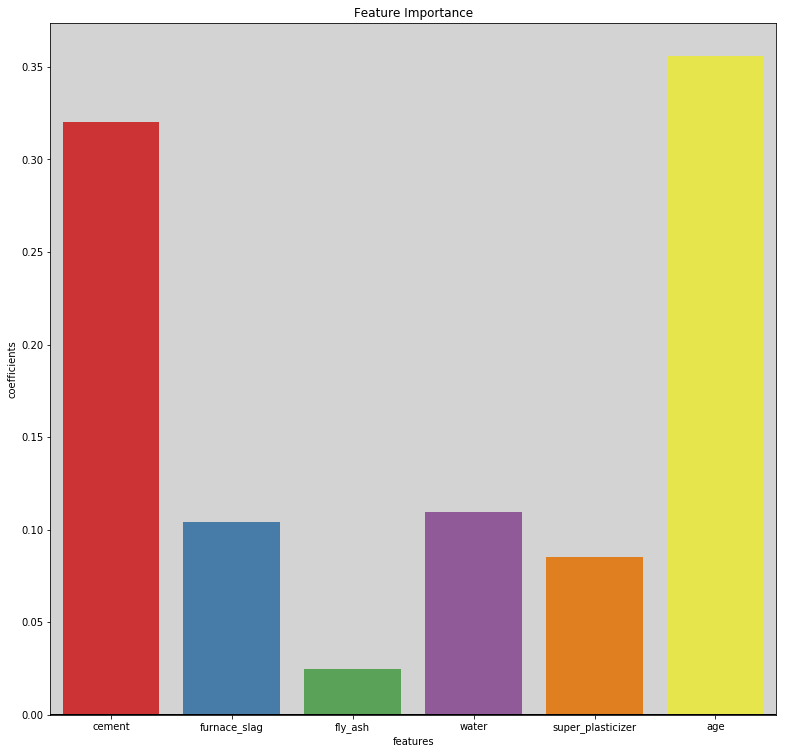

In [45]:
modelGBR = GradientBoostingRegressor(learning_rate= 0.1, max_depth = 2, n_estimators = 1000,
                                     random_state = 1, subsample = 0.75)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelGBR.fit(x_train, y_train).predict(x_test)

gbr_rscv_r2score = r2_score(y_test, y_pred)
gbr_rscv_mae = mean_absolute_error(y_test, y_pred)
gbr_rscv_mse = mean_squared_error(y_test, y_pred)

print_scores(features, modelGBR, y_test, y_pred)
plot_feature_importance_ensemble(features,modelGBR)

<div class="alert alert-block alert-info">
<b>Summary RandomizedGridSearchCV (Gradient Boosting Regressor):</b> R2 score is 0.91. In the feature importance bar chart, age and cement are almost similar associated with the target column. Water takes the 3rd slot with furnance_slag as fourth. Ideally the compressive strength comes with cement water and age primarily </div>

Consolidate all scores for each models with and without Randomized Search hyperparameters

In [46]:
scoreDataDF = pd.DataFrame({
    'Model_Name'       : ['LinearRegression','RandomForestR', 'ExtraTreeR', 'GradientBoostingR',
                         'RandomForestR_RSCV', 'ExtraTreeR_RSCV', 'GradientBoostingR_RSCV'],
    'R2_Score'    : [lr_r2score, rf_r2score, extraTree_r2score, gbr_r2score,
                    rf_rscv_r2score, extraTree_rscv_r2score, gbr_rscv_r2score],
    'Mean_Absolute_Error'    : [lr_mae, rf_mae, extraTree_mae, gbr_mae,
                               rf_rscv_mae, extraTree_rscv_mae, gbr_rscv_mae],
    'Mean_Squared_Error'   : [lr_mse, rf_mse, extraTree_mse, gbr_mse,
                             rf_rscv_mse, extraTree_rscv_mse, gbr_rscv_mse]
    }, columns = ['Model_Name', 'R2_Score', 'Mean_Absolute_Error', 'Mean_Squared_Error'])

scoreDataDF.sort_values(by='R2_Score', ascending=False)

scoreDataDF.head(10)

,Model_Name,R2_Score,Mean_Absolute_Error,Mean_Squared_Error
0,LinearRegression,0.679,0.443,0.340
1,RandomForestR,0.874,0.257,0.134
2,ExtraTreeR,0.884,0.230,0.123
3,GradientBoostingR,0.884,0.243,0.123
4,RandomForestR_RSCV,0.880,0.254,0.127
5,ExtraTreeR_RSCV,0.879,0.253,0.128
6,GradientBoostingR_RSCV,0.917,0.204,0.088


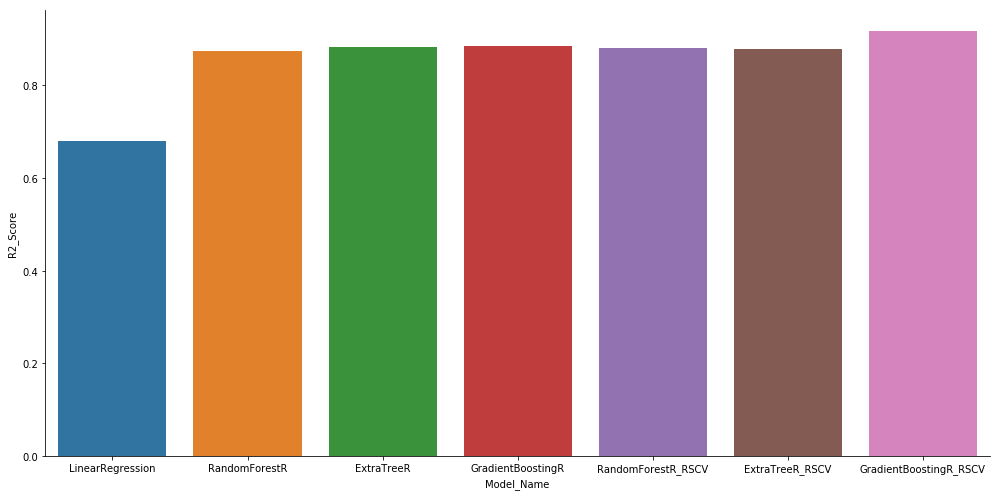

In [47]:
sns.factorplot(x= 'Model_Name', y= 'R2_Score', data= scoreDataDF, kind='bar', legend='True', size=7, aspect=2)

<div class="alert alert-block alert-info">
<b>Performance Summary:</b> Gradient Boosting Regressor after using the Randomized SearchCV hyperparameters, performed best among all other regressor models with R2 = 91.7%. Comparing the MSE and MSR of other models, GBM Regressor MSE reaches 0 (0.088) value and also the MAR is also lowest among all other regressor models
</div> 

# Then, for 95% significance level correspondent Gaussian critical value is 1.96.

**Since GBM performed well approx 91.7% r2 score, so will take this model to calculate the Confidence Interval**

In [48]:
modelGBR = GradientBoostingRegressor(learning_rate= 0.1, max_depth = 2, n_estimators = 1000,
                                     random_state = 1, subsample = 0.75)

x_train, x_test, y_train, y_test = split_train_test(dfConcreteStrengthScaledFeatures, features)
y_pred = modelGBR.fit(x_train, y_train).predict(x_test)

gbr_rscv_r2score = r2_score(y_test, y_pred)
gbr_rscv_r2score

0.9172232929794271

In [49]:
#estimate the standard deviation of your prediction
stdev = np.sqrt(sum((modelGBR.predict(x_train) - y_train)**2) / (len(y_train) - 2))
stdev

0.1571321846741391

In [50]:
lower = gbr_rscv_r2score - 1.96*stdev
upper = gbr_rscv_r2score + 1.96*stdev
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))

# print(gbr_rscv_r2score - 1.96*stdev, gbr_rscv_r2score + 1.96*stdev)

Prediction Interval: 0.308
95% likelihood that the true value is between 0.609 and 1.225


# Confidence intervals - 95% likelihood that the true value is between 0.609 and 1.225

--------------------------------------------------------------------------------------------------------------------------

# Summary Report

<div class="alert alert-block alert-info">
<b>Gradient Boosting Regressor is the best model identified:</b> It best performer with the Confidence Interval (95% likelihood) is in between [0.609, 1.225] 
</div>